In [64]:
# warningsを無視する
import warnings
warnings.filterwarnings('ignore')

# 5.3 モデルの改良

In [65]:
import numpy as np
import pandas as pd

In [66]:
# カーネルの場合
#df_train = pd.read_csv('../input/train.csv')
#df_test = pd.read_csv('../input/test.csv')

# 本レポジトリの場合
df_train = pd.read_csv("./titanic_csv/train.csv")
df_test = pd.read_csv("./titanic_csv/test.csv")

In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# 日本語表示用 ##カーネルでは日本語表示できない
plt.rcParams["font.size"] = 18
plt.rcParams['font.family'] = 'IPAPGothic' 

# サイズの設定
plt.rcParams['figure.figsize'] = (8.0, 6.0)

## 5.3.1 年齢の補完方法を変更する

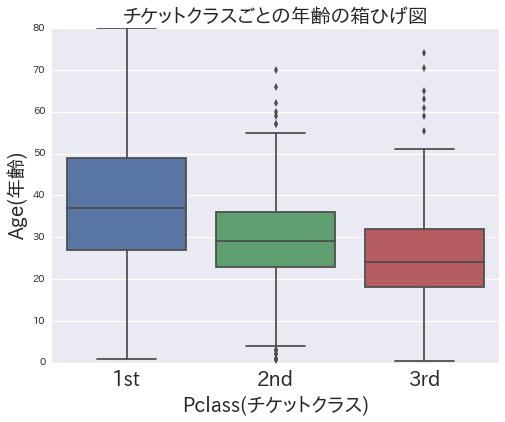

In [68]:
sns.boxplot(x='Pclass', y='Age', data=df_train)
plt.xticks([0.0,1.0,2.0], ['1st','2nd','3rd'], fontsize = 20)
plt.title('チケットクラスごとの年齢の箱ひげ図', fontsize = 20)
plt.xlabel('Pclass(チケットクラス)', fontsize = 20)
plt.ylabel('Age(年齢)', fontsize = 20)

In [69]:
# PclassごとにAgeの平均を算出
df_train.groupby('Pclass').mean()['Age'] 

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [70]:
# Embarkedの補完
df_train.loc[df_train['PassengerId'].isin([62, 830]), 'Embarked'] = 'C'

# Fareの補完
df_test.loc[df_test['PassengerId'] == 1044, 'Fare'] = 13.675550

#Age変換のための関数
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):        
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 30
        else:
            return 25    
    else:
        return Age


data = [df_train, df_test]
for df in data:
    # Ageの補完
    df['Age'] = df[['Age','Pclass']].apply(impute_age, axis = 1) 

    # 性別の変換
    df['Sex'] = df['Sex'].map({"male": 0, "female": 1})
        
    # Embarked
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    

In [71]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'])
df_test = pd.get_dummies(df_test, columns = ['Embarked'])

In [72]:
df_train.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
df_test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [73]:
X_train = df_train.drop(["PassengerId", "Survived"], axis=1) # 不要な列を削除
Y_train = df_train['Survived'] # Y_trainは、df_trainのSurvived列
X_test  = df_test.drop('PassengerId', axis=1).copy()

In [74]:
from sklearn.ensemble import RandomForestClassifier

# 学習と予測を行う
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, Y_train)
Y_prediction = forest.predict(X_test)
submission = pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Survived': Y_prediction
    })
submission.to_csv('submission.csv', index=False)